This notebook contains Anna's NN models

# A. Importing Helper Functions and Variables

Helper functions and global variables can be found [here]('http://localhost:8888/lab/tree/Code/Helper/config.py')

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf
import seaborn as sns
import sys 

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetV2L
from keras import metrics
from tensorflow.keras.metrics import BinaryAccuracy, AUC, Precision, Recall, TrueNegatives, TruePositives, FalsePositives, FalseNegatives
from sklearn.model_selection import train_test_split

# For reproducibility
np.random.seed(42)
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/utils/set_random_seed
tf.keras.utils.set_random_seed(42)

In [2]:
# Importing global variables
sys.path.append('../../Helper')
import config

Metal device set to: Apple M2 Max


### Find Shape of Images

* Each image is a 256 X 256 jpg image of human face either real or fake

In [3]:
# Create base_path variable for continued usage
base_path = '../../../Dataset/'

# Get the shape of a sample image
image_shape = img_to_array(load_img(base_path + 'Train/Real/real_0.jpg')).shape

# Print shape of sample image
print(image_shape)

# Set variable for width and height of image
w = image_shape[0]
h = image_shape[1]

(256, 256, 3)


### Import Train, Validation, and Test dataset from Directory

* Code modified from: Lesson 8.06-CNN

In [4]:
train = image_dataset_from_directory(
    base_path + '/Train',
    image_size=(w,h),
    batch_size=32,
    seed=42,
    label_mode='binary'
)

val = image_dataset_from_directory(
    base_path + '/Validation',
    image_size=(w,h),
    batch_size=32,
    seed=42,
    label_mode='binary'
)

test = image_dataset_from_directory(
    base_path + '/Test',
    image_size=(w,h),
    batch_size=32,
    label_mode='binary'
)

Found 140010 files belonging to 2 classes.
Found 39455 files belonging to 2 classes.
Found 10905 files belonging to 2 classes.


In [5]:
# Check to see the classes and example files in train dataset
train.class_names, train.file_paths[:5]

(['Fake', 'Real'],
 ['../../../Dataset//Train/Fake/fake_22599.jpg',
  '../../../Dataset//Train/Fake/fake_54816.jpg',
  '../../../Dataset//Train/Fake/fake_56285.jpg',
  '../../../Dataset//Train/Real/real_8796.jpg',
  '../../../Dataset//Train/Fake/fake_21378.jpg'])

In [6]:
# Check to see train is a BatchDataset
type(train)

tensorflow.python.data.ops.batch_op._BatchDataset

# B. Training CNN models 

## Model 1

Model 1 is a CNN model with three types of layers without any regularizations:
* Convolutional layer
* Pooling layer
* Densely Connected layer

In each layer, 64 neurons were used. This value was chosen arbitrarily to gage the performance of a simple CNN model.

In [7]:
model1 = Sequential()

model1.add(layers.Input(shape = (h,w,3)))
#normalize pixel and preprocess images in network
model1.add(layers.Rescaling(1./255))


#First Convolution layer
model1.add(Conv2D(64, (3,3), activation = 'relu'))
#MaxPooling
model1.add(MaxPooling2D(pool_size = (2,2)))


# 2nd Convolution layer
model1.add(Conv2D(64, (3,3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))


#To feed this into our model, we need to flatten
model1.add(Flatten())

#Fully connected layer
# 1 Hidden Layer
model1.add(Dense(64, activation = 'relu'))

#Output Layer
model1.add(Dense(1, activation = 'sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0

In [9]:
# Compile
model1.compile(
    optimizer='adam',
    loss = 'bce',
    metrics = ['acc',  
                         metrics.Precision(), metrics.Recall(), 
                         metrics.AUC(),
                         metrics.FalseNegatives(), metrics.FalsePositives(),
                         metrics.TrueNegatives(),
                         metrics.TruePositives()]
)

In [75]:
# Let's train the model by fitting it
h1 = model1.fit(train, validation_data = val, epochs = 10)

Epoch 1/10
4376/4376 [==============================] - 864s 197ms/step - loss: 0.4232 - acc: 0.8016 - precision_6: 0.7887 - recall_6: 0.8238 - auc_6: 0.8869 - false_negatives_6: 12331.0000 - false_positives_6: 15452.0000 - true_negatives_6: 54549.0000 - true_positives_6: 57670.0000 - val_loss: 0.4248 - val_acc: 0.7998 - val_precision_6: 0.7888 - val_recall_6: 0.8210 - val_auc_6: 0.8856 - val_false_negatives_6: 3541.0000 - val_false_positives_6: 4351.0000 - val_true_negatives_6: 15290.0000 - val_true_positives_6: 16246.0000
Epoch 2/10
4376/4376 [==============================] - 859s 196ms/step - loss: 0.3120 - acc: 0.8612 - precision_6: 0.8499 - recall_6: 0.8773 - auc_6: 0.9393 - false_negatives_6: 8590.0000 - false_positives_6: 10845.0000 - true_negatives_6: 59156.0000 - true_positives_6: 61411.0000 - val_loss: 0.4197 - val_acc: 0.8123 - val_precision_6: 0.8472 - val_recall_6: 0.7637 - val_auc_6: 0.9002 - val_false_negatives_6: 4676.0000 - val_false_positives_6: 2725.0000 - val_true_

In [300]:
# Evaluate last epoch Train and Test Loss and Accuracy scores
print(f"Train Loss: {h1.history['loss'][-1]}\n\
Val Loss: {h1.history['val_loss'][-1]}\n\
Train Acc:{h1.history['acc'][-1]}\n\
Val Acc:{h1.history['val_acc'][-1]}")

Train Loss: 0.04641798883676529
Test Loss: 0.7281487584114075
Train Acc:0.9830074310302734
Test Acc:0.8599725961685181


**Loss** values indicate the summation of errors between the predicted and actual values. A lower loss value indicates a better fit.

**Accuracy** values indicate how well model predicts the correct class (Real or Fake). A higher accuracy value indicates a better performing model.

<u>Model 1 Performance</u>
* The Training loss (0.046) is significantly lower than the test loss (0.728). This model may be overfitting to the training data since it performs better on the training data, but less well on unseen test data.
* The Training accuracy (98.3%) is higher than the test accuracy (86.0%). This further suggests the presence of overfitting, as the model is not generalizing well to the test data. 

In [280]:
# Append last epoch scores to model_eval.csv 
model_scores_to_csv(model1, h1, 'model_1')

###  EDA function

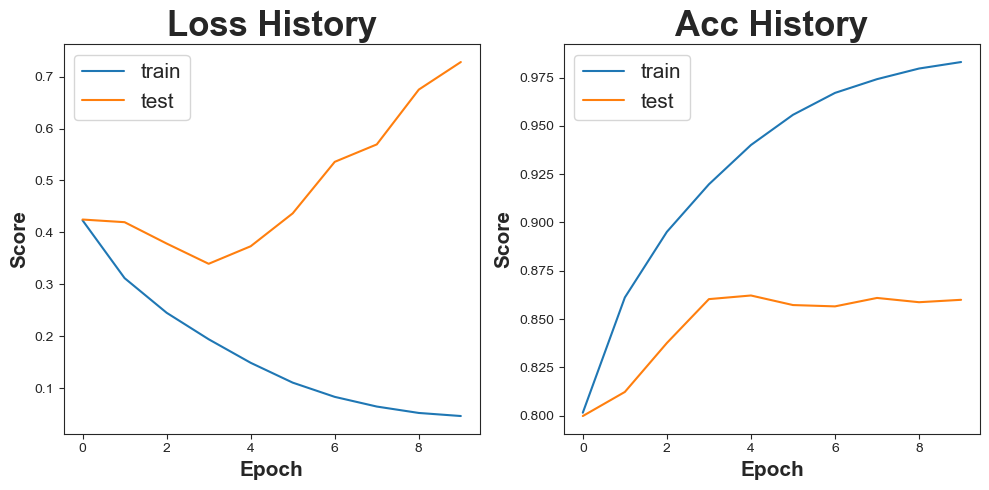

<Figure size 640x480 with 0 Axes>

In [333]:
config.graph_me(h1, ['acc'])

plt.savefig('model1_r.png')

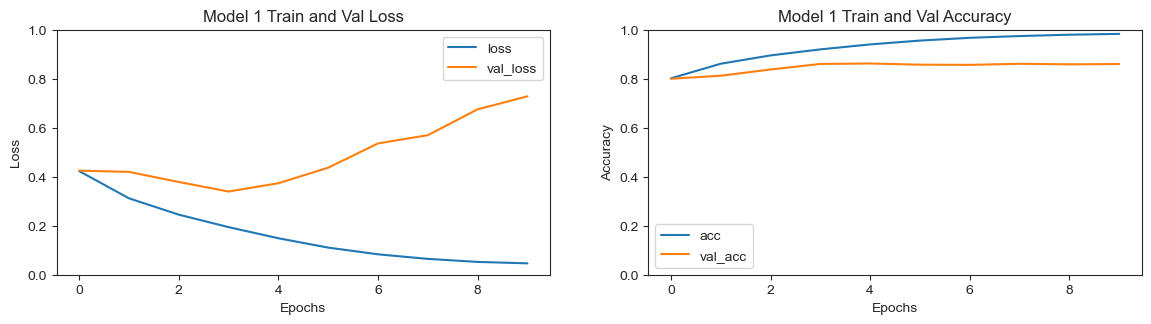

In [332]:
plt.figure(figsize= config.subplot_fig_size)

# Plot the loss
plt.subplot(2,2,1)
plt.plot(h1.history['loss'],label='loss')
plt.plot(h1.history['val_loss'],label='val_loss')
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model 1 Train and Val Loss')
plt.ylim(0, 1)

#Plot the Accuracy
plt.subplot(2,2,2)
plt.plot(h1.history['acc'],label='train_accuracy')
plt.plot(h1.history['val_acc'],label='val_accuracy')
plt.legend(['acc', 'val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model 1 Train and Val Accuracy')
plt.ylim(0, 1)

# Save the plot as a PNG image
plt.savefig('model1.png')

In [77]:
# serialize model to JSON
anna_model1_json = model1.to_json()
with open("anna_model1.json", "w") as json_file:
    json_file.write(anna_model1_json)

# serialize weights to HDF5
model1.save_weights("anna_model1.h5")
print("Saved model to disk")

Saved model to disk


In [78]:
# Save model
model1.save('anna_model1_complete.h5')

## Model 2 - Larger Neurons

In the 2nd model, larger neurons were utilized and regularizations were added to try to combat the model overfitting to the training set.
* Regularization techniques used: 
    * **BatchNormalization:** helps stabilize and accelerate the training process by normalizing the activations. This helps the model learn more effectively. It also has a slight regularization effect in that it helps reduce overfitting and improve the model's generalize to new/unseen data.
        * BatchNormalization was applied *before* the activation function. [(Source)](https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/)
    * **Dropout:**  during training, some number of layer outputs are randomly dropped. This also helps with overfitting in the model. 

In [8]:
model2 = Sequential()

model2.add(layers.Input(shape = (h,w,3)))
#normalize pixel and preprocess images in network
model2.add(layers.Rescaling(1./255))


#First Convolution layer
model2.add(Conv2D(64, (3,3), activation = 'relu'))

#MaxPooling
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(BatchNormalization())

# 2nd Convolution layer
model2.add(Conv2D(128, (3,3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(layers.Dropout(0.2))

#To feed this into our model, we need to flatten
model2.add(Flatten())

#Fully connected layer
# 1 Hidden Layer
model2.add(Dense(256, activation = 'relu'))
model2.add(BatchNormalization())

#Output Layer
model2.add(Dense(1, activation = 'sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 128)     

In [9]:
# Compile
model2.compile(
    optimizer='adam',
    loss = 'bce',
    metrics = ['acc', 
                         metrics.Precision(), metrics.Recall(), 
                         metrics.AUC(),
                         metrics.FalseNegatives(), metrics.FalsePositives(),
                         metrics.TrueNegatives(),
                         metrics.TruePositives()]
)

In [10]:
# Let's train the model by fitting it
h2 = model2.fit(train, validation_data = val, epochs = 10)

Epoch 1/10


2023-05-20 01:13:17.417227: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4376/4376 [==============================] - 1645s 376ms/step - loss: 0.3072 - acc: 0.8651 - precision_1: 0.8578 - recall_1: 0.8753 - auc_1: 0.9422 - false_negatives_1: 8729.0000 - false_positives_1: 10157.0000 - true_negatives_1: 59851.0000 - true_positives_1: 61273.0000 - val_loss: 0.2535 - val_acc: 0.8928 - val_precision_1: 0.9085 - val_recall_1: 0.8744 - val_auc_1: 0.9619 - val_false_negatives_1: 2487.0000 - val_false_positives_1: 1744.0000 - val_true_negatives_1: 17911.0000 - val_true_positives_1: 17313.0000
Epoch 2/10
4376/4376 [==============================] - 1646s 376ms/step - loss: 0.1483 - acc: 0.9406 - precision_1: 0.9358 - recall_1: 0.9460 - auc_1: 0.9863 - false_negatives_1: 3778.0000 - false_positives_1: 4543.0000 - true_negatives_1: 65465.0000 - true_positives_1: 66224.0000 - val_loss: 0.2408 - val_acc: 0.9022 - val_precision_1: 0.8797 - val_recall_1: 0.9326 - val_auc_1: 0.9667 - val_false_negatives_1: 1335.0000 - val_false_positives_1: 2524.0000 - val_true_negatives_1

In [11]:
# Evaluate last epoch Train and Test Loss and Accuracy scores
print(f"Train Loss: {h2.history['loss'][-1]}\n\
Val Loss: {h2.history['val_loss'][-1]}\n\
Train Acc:{h2.history['acc'][-1]}\n\
Val Acc:{h2.history['val_acc'][-1]}")

Train Loss: 0.02705742046236992
Test Loss: 0.45739367604255676
Train Acc:0.9906935095787048
Test Acc:0.9101001620292664


<u>Model 2 Performance</u>
* The Training and Tetsting Loss has both decreased compared to model 1. There still seems to be some overfitting as the test loss (0.457) is significantly greater than the train loss (0.027).
* The Training accuracy (99.1%) is higher than the test accuracy (91.0%). Both values have increased compared to model 1. 

Further methods will need to be explored to help with overfitting.

In [20]:
def model_scores_to_csv(models, history_list, model_name): 
    #Specified Columns:
    columns = ['train_loss','train_acc','train_precision','train_recall','train_auc','train_fn','train_fp','train_tn','train_tp','val_loss', 'val_acc','val_precision','val_recall','val_auc','val_fn','val_fp','val_tn','val_tp']
    
    if 'model_eval.csv' not in os.listdir('../../Results/'):
        df = pd.DataFrame(columns=columns, index=['models'])
    
        df.to_csv('../../Results/model_eval.csv')
    
    # Get the last epoch values from the history dictionary
    last_epoch_values = [list(values)[-1] for values in history_list.history.values()]

    # Create a dictionary with the model scores and the model name as the index
    model_scores = {col: [val] for col, val in zip(columns, last_epoch_values)}

    # Set the model name as the index in the dictionary
    model_scores['models'] = model_name

    # Create a temporary dataframe with the model scores
    df = pd.DataFrame(model_scores)
    
    df.set_index('models', inplace = True, drop = True)

    # Append the model scores to the CSV file
    df.to_csv('../../Results/model_eval.csv', mode='a', header = False)

    return

In [21]:
# Append last epoch scores to model_eval.csv 
config.model_scores_to_csv(model2, h2, 'model_2')

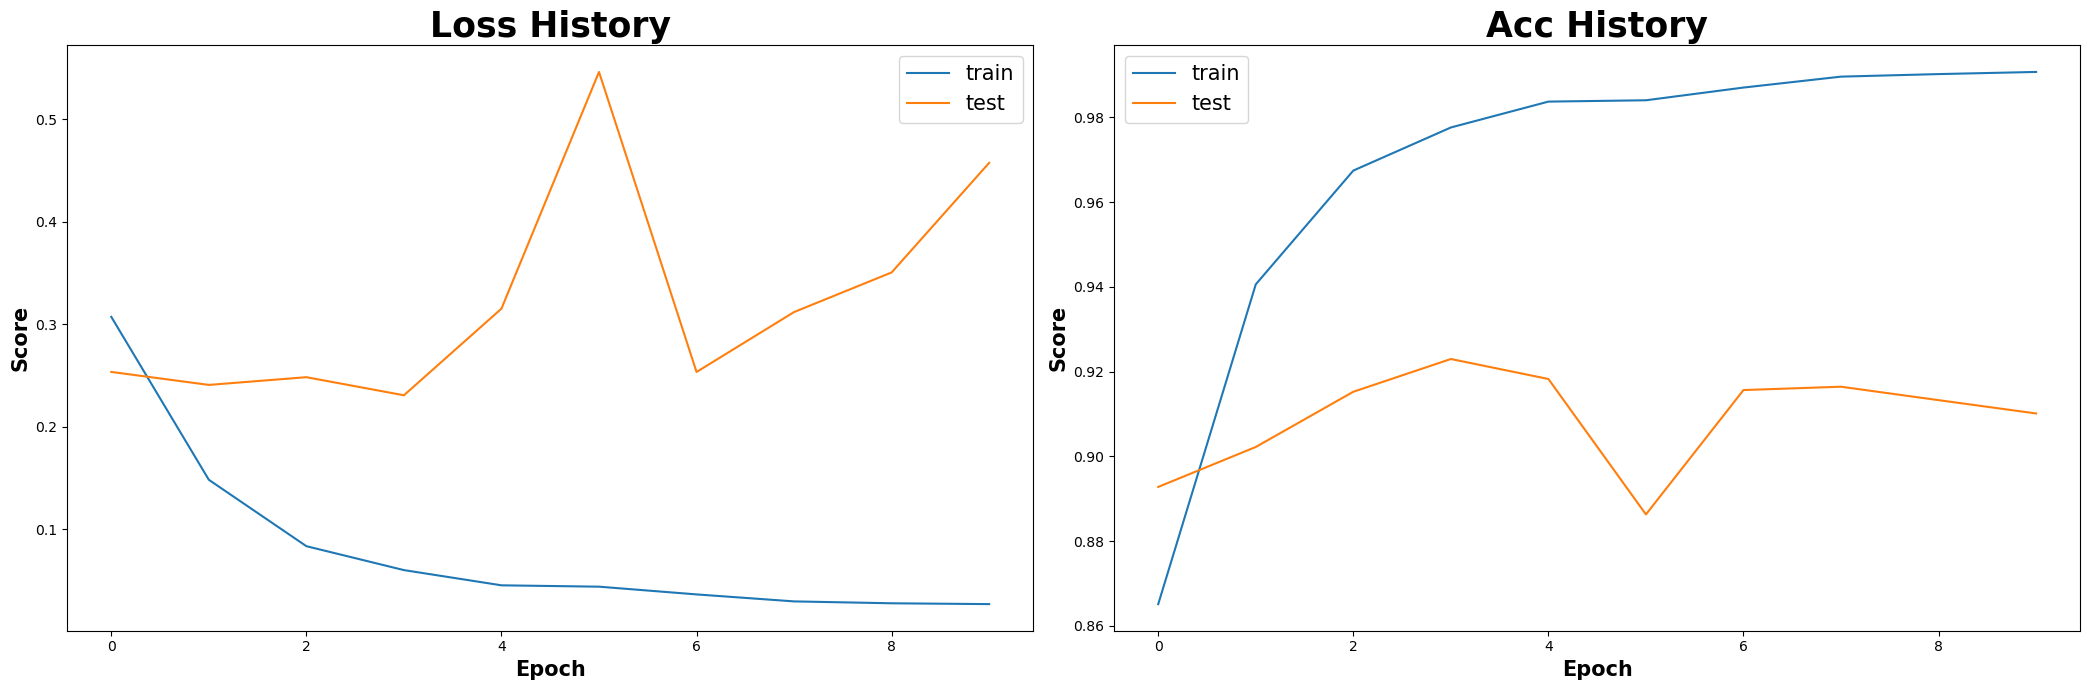

<Figure size 640x480 with 0 Axes>

In [24]:
config.graph_me(h2, ['acc'])

plt.savefig('model2_r.png')

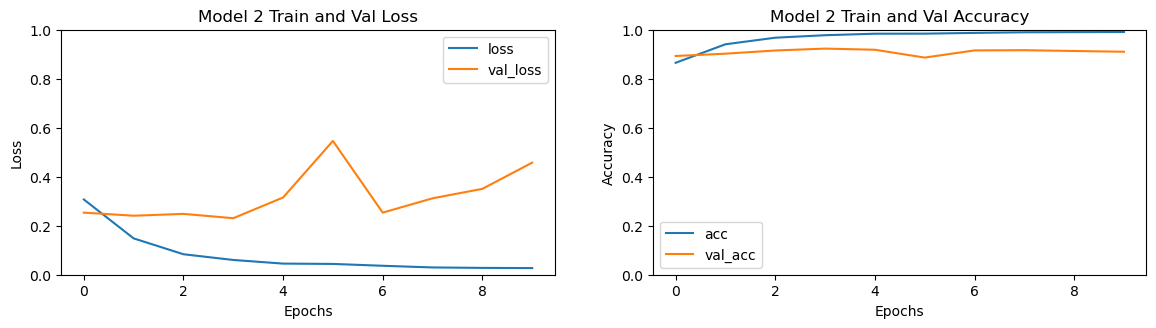

In [25]:
plt.figure(figsize= config.subplot_fig_size)

# Plot the loss
plt.subplot(2,2,1)
plt.plot(h2.history['loss'],label='loss')
plt.plot(h2.history['val_loss'],label='val_loss')
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model 2 Train and Val Loss')
plt.ylim(0, 1)

#Plot the Accuracy
plt.subplot(2,2,2)
plt.plot(h2.history['acc'],label='train_accuracy')
plt.plot(h2.history['val_acc'],label='val_accuracy')
plt.legend(['acc', 'val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model 2 Train and Val Accuracy')
plt.ylim(0, 1)

# Save the plot as a PNG image
plt.savefig('model2.png')

In [27]:
# serialize model to JSON
anna_model2_json = model2.to_json()
with open("anna_model2.json", "w") as json_file:
    json_file.write(anna_model2_json)

# serialize weights to HDF5
model2.save_weights("anna_model2.h5")
print("Saved model to disk")

Saved model to disk


In [28]:
# Save model
model2.save('anna_model2_complete.h5')

# Model 3 - Reduce LR on Plateau & Early Stopping

In the 3rd Model to combat overfitting, two callback functions were applied at the training process:

* **EarlyStopping**: tells the model when the training process to stop. The value to monitor was set to be the `val_loss` in hopes to minimize this metric. The patience was set to 3, which is the number of epochs the training should be stopped if there is no improvement.

* **ReduceLROnPlateau**: tells the model to reduce the learning rate when `val_acc` has stopped improving. The patience was also set to 3 and the factor by which the learning rate will be reduced was set to 0.5 (new_lr = lr * 0.5). The lower bound on the learning rate was set to 0.00001.

These callbacks were utilized in hopes to minimize the `val_loss` and increase the `val_acc`.

Additionally, a second Dropout layer was added in the hidden layer, which nullifies some hidden neurons. This can further help prevent overfitting on the training data.

In [29]:
# Source: https://keras.io/api/callbacks/reduce_lr_on_plateau/
# Reduce LR when metric has stopped improving
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_acc',
    factor=0.5,
    patience=3,
    verbose=0,
    min_lr=0.00001,
)

In [34]:
es = EarlyStopping(patience=3, verbose = 1, monitor = 'val_loss')

In [31]:
model3 = Sequential()

model3.add(layers.Input(shape = (h,w,3)))
#normalize pixel and preprocess images in network
model3.add(layers.Rescaling(1./255))


#First Convolution layer
model3.add(Conv2D(64, (3,3), activation = 'relu'))

#MaxPooling
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(BatchNormalization())

# 2nd Convolution layer
model3.add(Conv2D(128, (3,3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(BatchNormalization())
model3.add(layers.Dropout(0.2))

#To feed this into our model, we need to flatten
model3.add(Flatten())

#Fully connected layer
# 1 Hidden Layer
model3.add(Dense(256, activation = 'relu'))
model3.add(BatchNormalization())
model2.add(layers.Dropout(0.2))    #Added Drop Out

#Output Layer
model3.add(Dense(1, activation = 'sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 127, 127, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 128)     

In [32]:
# Compile
model3.compile(
    optimizer='adam',
    loss = 'bce',
    metrics = ['acc', 
                         metrics.Precision(), metrics.Recall(), 
                         metrics.AUC(),
                         metrics.FalseNegatives(), metrics.FalsePositives(),
                         metrics.TrueNegatives(),
                         metrics.TruePositives()]
)

In [35]:
# Let's train the model by fitting it
h3 = model3.fit(train, validation_data = val, epochs = 10, callbacks = [reduce_lr, es])

Epoch 1/10
4376/4376 [==============================] - 1642s 375ms/step - loss: 0.2690 - acc: 0.8845 - precision_2: 0.8773 - recall_2: 0.8939 - auc_2: 0.9555 - false_negatives_2: 7428.0000 - false_positives_2: 8750.0000 - true_negatives_2: 61258.0000 - true_positives_2: 62574.0000 - val_loss: 0.3488 - val_acc: 0.8546 - val_precision_2: 0.9403 - val_recall_2: 0.7585 - val_auc_2: 0.9548 - val_false_negatives_2: 4781.0000 - val_false_positives_2: 954.0000 - val_true_negatives_2: 18701.0000 - val_true_positives_2: 15019.0000 - lr: 0.0010
Epoch 2/10
4376/4376 [==============================] - 1638s 374ms/step - loss: 0.1496 - acc: 0.9394 - precision_2: 0.9348 - recall_2: 0.9447 - auc_2: 0.9861 - false_negatives_2: 3868.0000 - false_positives_2: 4610.0000 - true_negatives_2: 65398.0000 - true_positives_2: 66134.0000 - val_loss: 0.2667 - val_acc: 0.8884 - val_precision_2: 0.8841 - val_recall_2: 0.8949 - val_auc_2: 0.9589 - val_false_negatives_2: 2081.0000 - val_false_positives_2: 2323.0000 

In [19]:
# Let's train the model by fitting it
h3 = model3.fit(train, validation_data = val, epochs = 10, callbacks = [reduce_lr, es])

Epoch 1/10
4376/4376 [==============================] - 1809s 413ms/step - loss: 0.3104 - acc: 0.8638 - precision_1: 0.8591 - recall_1: 0.8704 - auc_1: 0.9418 - false_negatives_1: 9071.0000 - false_positives_1: 9997.0000 - true_negatives_1: 60004.0000 - true_positives_1: 60930.0000 - val_loss: 0.2722 - val_acc: 0.8841 - val_precision_1: 0.8920 - val_recall_1: 0.8750 - val_auc_1: 0.9559 - val_false_negatives_1: 2474.0000 - val_false_positives_1: 2096.0000 - val_true_negatives_1: 17545.0000 - val_true_positives_1: 17313.0000 - lr: 0.0010
Epoch 2/10
4376/4376 [==============================] - 1728s 395ms/step - loss: 0.1396 - acc: 0.9443 - precision_1: 0.9401 - recall_1: 0.9491 - auc_1: 0.9878 - false_negatives_1: 3565.0000 - false_positives_1: 4233.0000 - true_negatives_1: 65768.0000 - true_positives_1: 66436.0000 - val_loss: 0.2306 - val_acc: 0.9080 - val_precision_1: 0.8931 - val_recall_1: 0.9277 - val_auc_1: 0.9710 - val_false_negatives_1: 1430.0000 - val_false_positives_1: 2197.0000

In [36]:
# Evaluate last epoch Train and Test Loss and Accuracy scores
print(f"Train Loss: {h3.history['loss'][-1]}\n\
Val Loss: {h3.history['val_loss'][-1]}\n\
Train Acc:{h3.history['acc'][-1]}\n\
Val Acc:{h3.history['val_acc'][-1]}")

Train Loss: 0.03715172037482262
Val Loss: 0.4872954785823822
Train Acc:0.9869294762611389
Val Acc:0.7928779721260071


<u>Model 3 Performance</u>
* The Training and Tetsting Loss has both decreased compared to model 1. There still seems to be some overfitting as the test loss (0.457) is significantly greater than the train loss (0.027).
* The Training accuracy (99.1%) is higher than the test accuracy (91.0%). Both values have increased compared to model 1. 

Further methods will need to be explored to help with overfitting.

In [37]:
# Append last epoch scores to model_eval.csv 
config.model_scores_to_csv(model3, h3, 'model_3')

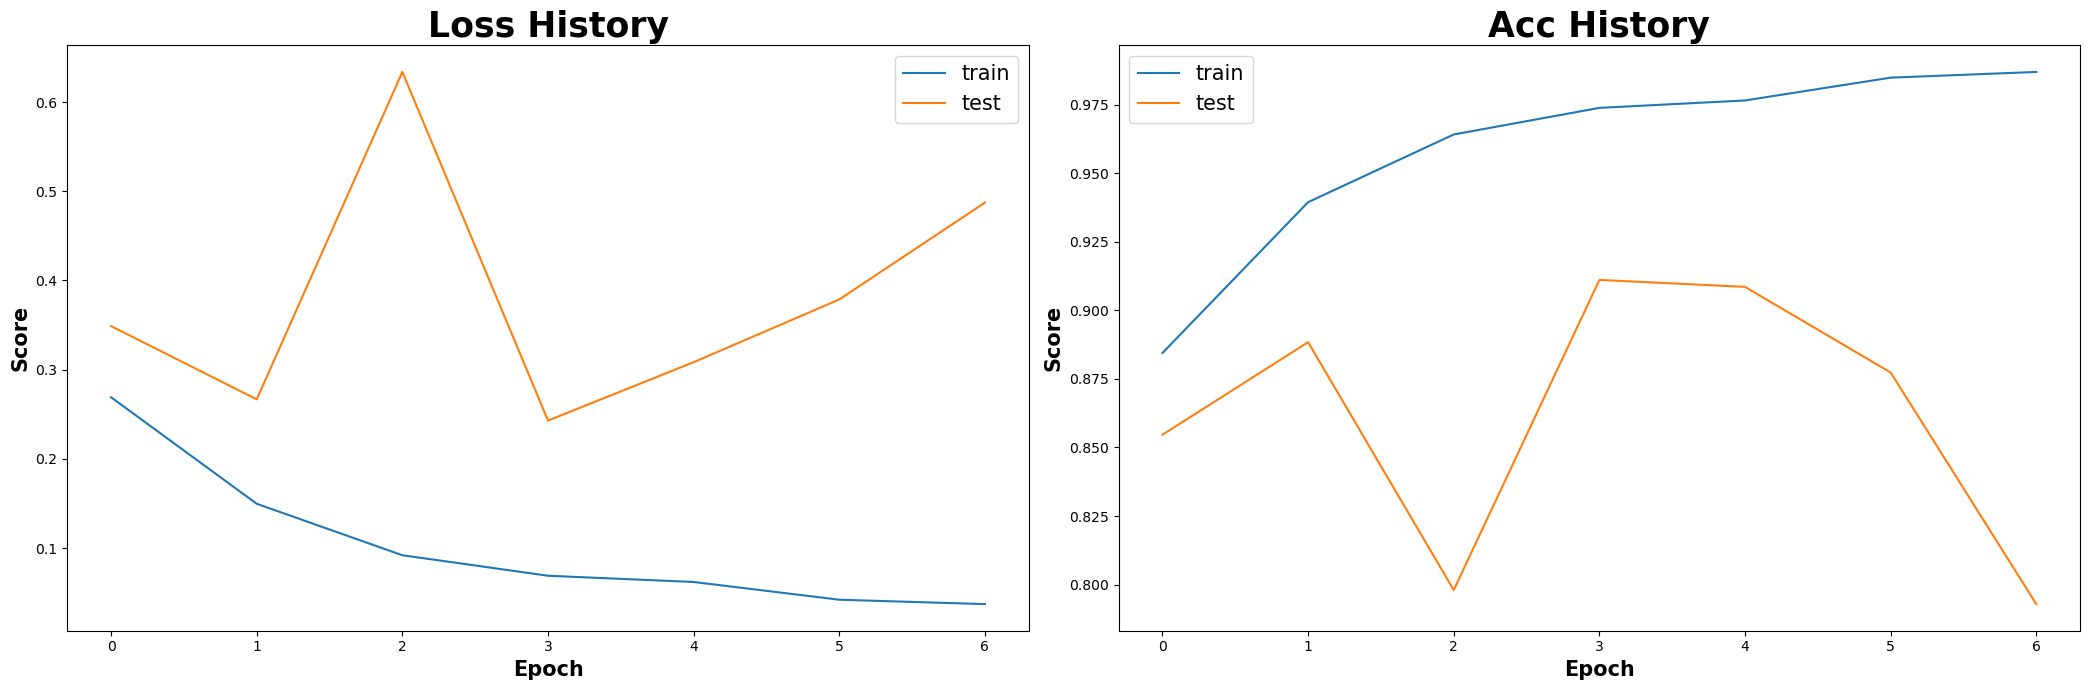

<Figure size 640x480 with 0 Axes>

In [38]:
config.graph_me(h3, ['acc'])

plt.savefig('model3_r.png')

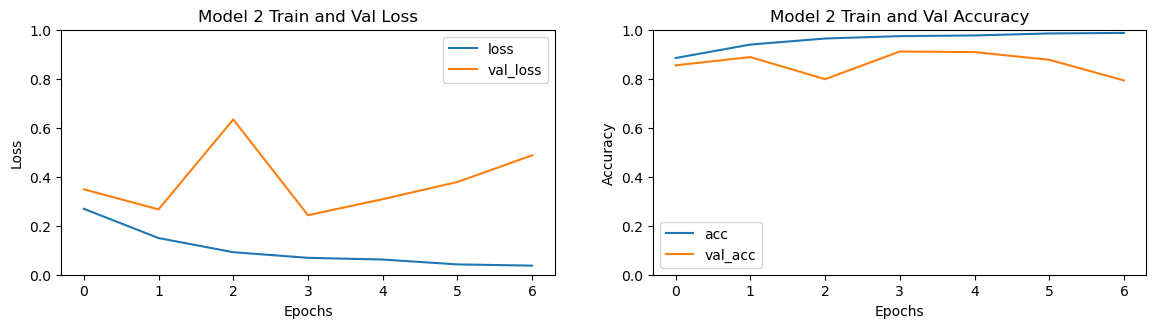

In [39]:
plt.figure(figsize= config.subplot_fig_size)

# Plot the loss
plt.subplot(2,2,1)
plt.plot(h3.history['loss'],label='loss')
plt.plot(h3.history['val_loss'],label='val_loss')
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model 2 Train and Val Loss')
plt.ylim(0, 1)

#Plot the Accuracy
plt.subplot(2,2,2)
plt.plot(h3.history['acc'],label='train_accuracy')
plt.plot(h3.history['val_acc'],label='val_accuracy')
plt.legend(['acc', 'val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model 2 Train and Val Accuracy')
plt.ylim(0, 1)

# Save the plot as a PNG image
plt.savefig('model3.png')

In [40]:
# serialize model to JSON
anna_model3_json = model3.to_json()
with open("anna_model3.json", "w") as json_file:
    json_file.write(anna_model3_json)

# serialize weights to HDF5
model3.save_weights("anna_model3.h5")
print("Saved model to disk")

Saved model to disk


In [41]:
model3.save('anna_model3_complete.h5')

# Model 4 - larger Dropout

In [43]:
model4 = Sequential()

model4.add(layers.Input(shape = (h,w,3)))
#normalize pixel and preprocess images in network
model4.add(layers.Rescaling(1./255))


#First Convolution layer
model4.add(Conv2D(64, (3,3), activation = 'relu'))

#MaxPooling
model4.add(MaxPooling2D(pool_size = (2,2)))
model4.add(BatchNormalization())

# 2nd Convolution layer
model4.add(Conv2D(128, (3,3), activation = 'relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(BatchNormalization())
model4.add(layers.Dropout(0.3)) #Larger Dropout

#To feed this into our model, we need to flatten
model4.add(Flatten())

#Fully connected layer
# 1 Hidden Layer
model4.add(Dense(256, activation = 'relu'))
model4.add(BatchNormalization())
#model4.add(layers.Dropout(0.3))     #Removed Dropout since it did worse in model3

#Output Layer
model4.add(Dense(1, activation = 'sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 127, 127, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 128)     

In [44]:
# Compile
model4.compile(
    optimizer='adam',
    loss = 'bce',
    metrics = ['acc', 
                         metrics.Precision(), metrics.Recall(), 
                         metrics.AUC(),
                         metrics.FalseNegatives(), metrics.FalsePositives(),
                         metrics.TrueNegatives(),
                         metrics.TruePositives()]
)

In [18]:
# Let's train the model by fitting it
h4 = model4.fit(train, validation_data = val, epochs = 10, callbacks = [reduce_lr, es])

Epoch 1/10
4376/4376 [==============================] - 1646s 376ms/step - loss: 0.3266 - acc: 0.8534 - precision_1: 0.8475 - recall_1: 0.8619 - auc_1: 0.9344 - false_negatives_1: 9664.0000 - false_positives_1: 10861.0000 - true_negatives_1: 59140.0000 - true_positives_1: 60337.0000 - val_loss: 0.4658 - val_acc: 0.7966 - val_precision_1: 0.7278 - val_recall_1: 0.9500 - val_auc_1: 0.9222 - val_false_negatives_1: 989.0000 - val_false_positives_1: 7029.0000 - val_true_negatives_1: 12612.0000 - val_true_positives_1: 18798.0000 - lr: 0.0010
Epoch 2/10
4376/4376 [==============================] - 1646s 376ms/step - loss: 0.1530 - acc: 0.9370 - precision_1: 0.9323 - recall_1: 0.9424 - auc_1: 0.9855 - false_negatives_1: 4033.0000 - false_positives_1: 4791.0000 - true_negatives_1: 65210.0000 - true_positives_1: 65968.0000 - val_loss: 0.2480 - val_acc: 0.8996 - val_precision_1: 0.8899 - val_recall_1: 0.9128 - val_auc_1: 0.9650 - val_false_negatives_1: 1726.0000 - val_false_positives_1: 2234.0000

In [ ]:
# serialize model to JSON
anna_model4_json = model4.to_json()
with open("anna_model4.json", "w") as json_file:
    json_file.write(anna_model4_json)

# serialize weights to HDF5
model4.save_weights("anna_model4.h5")
print("Saved model to disk")

In [ ]:
model4.save('anna_model4_complete.h5')

# C. Transfer Learning

## Model 5: EfficientNetV2L 

In [10]:
# Source: https://keras.io/api/applications/efficientnet_v2/

model5 = Sequential()

effnet_V2L_pretrained = EfficientNetV2L(
    weights='imagenet',   
    input_shape=(h,w,3), 
    include_top=False,
    pooling='max',
    classes = 2,
    include_preprocessing=True     #Efficientnet_2L expects [-1, 1] range, if set to False
)

effnet_V2L_pretrained.trainable = False

model5.add(effnet_V2L_pretrained)

model5.add(Flatten())

model5.add(Dense(64, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.3))

model5.add(Dense(32, activation = 'relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.3))

model5.add(Dense(units = 1, activation='sigmoid'))
model5.summary()

473176280/473176280 [==============================] - 9s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-l (Functiona  (None, 1280)             117746848 
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                     

In [11]:
# Compile
model5.compile(
    optimizer='adam',
    loss = 'bce',
    metrics = ['acc', 
                         metrics.Precision(), metrics.Recall(), 
                         metrics.AUC(),
                         metrics.FalseNegatives(), metrics.FalsePositives(),
                         metrics.TrueNegatives(),
                         metrics.TruePositives()]
)

In [15]:
h5 = model5.fit(train, validation_data = val, epochs = 10, callbacks = [reduce_lr, es])

Epoch 1/10


2023-05-16 20:26:39.682261: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4376/4376 [==============================] - 3147s 716ms/step - loss: 0.6000 - acc: 0.6790 - precision: 0.6764 - recall: 0.6862 - auc: 0.7430 - false_negatives: 21967.0000 - false_positives: 22975.0000 - true_negatives: 47026.0000 - true_positives: 48034.0000 - val_loss: 0.5479 - val_acc: 0.7189 - val_precision: 0.7236 - val_recall: 0.7117 - val_auc: 0.7967 - val_false_negatives: 5705.0000 - val_false_positives: 5378.0000 - val_true_negatives: 14263.0000 - val_true_positives: 14082.0000 - lr: 0.0010
Epoch 2/10
4376/4376 [==============================] - 3359s 768ms/step - loss: 0.5665 - acc: 0.7045 - precision: 0.6981 - recall: 0.7205 - auc: 0.7757 - false_negatives: 19565.0000 - false_positives: 21811.0000 - true_negatives: 48190.0000 - true_positives: 50436.0000 - val_loss: 0.5432 - val_acc: 0.7239 - val_precision: 0.7203 - val_recall: 0.7353 - val_auc: 0.8028 - val_false_negatives: 5237.0000 - val_false_positives: 5650.0000 - val_true_negatives: 13991.0000 - val_true_positives: 145

KeyboardInterrupt: 

# Model 6: EfficientNetV2L with larger Neuron size

In [19]:
model6 = Sequential()

effnet_V2L_pretrained = EfficientNetV2L(
    weights='imagenet',   
    input_shape=(h,w,3), 
    include_top=False,
    include_preprocessing=True     #Efficientnet_2L expects [-1, 1] range, if set to False
)

effnet_V2L_pretrained.trainable = False

model6.add(effnet_V2L_pretrained)

model6.add(Flatten())

model6.add(Dense(256, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.3))

model6.add(Dense(units = 1, activation='sigmoid'))
model6.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-l (Functiona  (None, 8, 8, 1280)       117746848 
 l)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 81920)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               20971776  
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [20]:
# Compile
model6.compile(
    optimizer='adam',
    loss = 'bce',
    metrics = ['acc', 
                         metrics.Precision(), metrics.Recall(), 
                         metrics.AUC(),
                         metrics.FalseNegatives(), metrics.FalsePositives(),
                         metrics.TrueNegatives(),
                         metrics.TruePositives()]
)

In [21]:
h6 = model6.fit(train, validation_data = val, epochs = 10, callbacks = [reduce_lr, es])

Epoch 1/10
4376/4376 [==============================] - 2147s 488ms/step - loss: 0.3674 - acc: 0.8337 - precision_2: 0.8272 - recall_2: 0.8435 - auc_2: 0.9159 - false_negatives_2: 10957.0000 - false_positives_2: 12331.0000 - true_negatives_2: 57670.0000 - true_positives_2: 59044.0000 - val_loss: 0.3269 - val_acc: 0.8620 - val_precision_2: 0.8626 - val_recall_2: 0.8624 - val_auc_2: 0.9383 - val_false_negatives_2: 2722.0000 - val_false_positives_2: 2718.0000 - val_true_negatives_2: 16923.0000 - val_true_positives_2: 17065.0000 - lr: 0.0010
Epoch 2/10
4376/4376 [==============================] - 2073s 474ms/step - loss: 0.2745 - acc: 0.8820 - precision_2: 0.8777 - recall_2: 0.8876 - auc_2: 0.9537 - false_negatives_2: 7865.0000 - false_positives_2: 8656.0000 - true_negatives_2: 61345.0000 - true_positives_2: 62136.0000 - val_loss: 0.3118 - val_acc: 0.8620 - val_precision_2: 0.9043 - val_recall_2: 0.8109 - val_auc_2: 0.9464 - val_false_negatives_2: 3741.0000 - val_false_positives_2: 1699.00

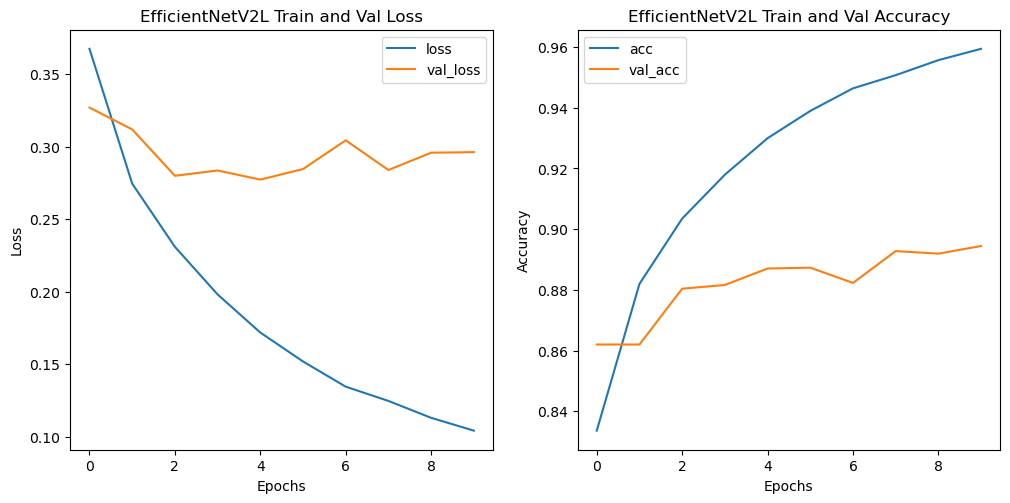

In [277]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(h6.history['loss'],label='loss')
plt.plot(h6.history['val_loss'],label='val_loss')
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('EfficientNetV2L Train and Val Loss')



plt.subplot(2,2,2)
plt.plot(h6.history['acc'],label='train_accuracy')
plt.plot(h6.history['val_acc'],label='val_accuracy')
plt.legend(['acc', 'val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('EfficientNetV2L Train and Val Accuracy');

In [83]:
# serialize model to JSON
anna_model6_json = model6.to_json()
with open("anna_model6.json", "w") as json_file:
    json_file.write(anna_model6_json)

# serialize weights to HDF5
model6.save_weights("anna_model6.h5")
print("Saved model to disk")

Saved model to disk


In [84]:
model6.save('anna_model6_complete.h5')

### Ran model 6 another 10 epochs

In [22]:
h7 = model6.fit(train, validation_data = val, epochs = 10, callbacks = [reduce_lr, es])

Epoch 1/10
4376/4376 [==============================] - 2136s 488ms/step - loss: 0.0970 - acc: 0.9629 - precision_2: 0.9616 - recall_2: 0.9643 - auc_2: 0.9938 - false_negatives_2: 2501.0000 - false_positives_2: 2698.0000 - true_negatives_2: 67303.0000 - true_positives_2: 67500.0000 - val_loss: 0.2993 - val_acc: 0.8948 - val_precision_2: 0.9032 - val_recall_2: 0.8853 - val_auc_2: 0.9574 - val_false_negatives_2: 2269.0000 - val_false_positives_2: 1877.0000 - val_true_negatives_2: 17764.0000 - val_true_positives_2: 17518.0000 - lr: 0.0010
Epoch 2/10
4376/4376 [==============================] - 2136s 488ms/step - loss: 0.0926 - acc: 0.9645 - precision_2: 0.9638 - recall_2: 0.9653 - auc_2: 0.9943 - false_negatives_2: 2431.0000 - false_positives_2: 2536.0000 - true_negatives_2: 67465.0000 - true_positives_2: 67570.0000 - val_loss: 0.2993 - val_acc: 0.8973 - val_precision_2: 0.8965 - val_recall_2: 0.8992 - val_auc_2: 0.9587 - val_false_negatives_2: 1995.0000 - val_false_positives_2: 2055.0000

# Data Augmentation

In [47]:
# Imports
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import (RandomFlip, RandomRotation, 
                                                                RandomZoom, RandomContrast)

In [49]:
# Test on single image

train_path = '../deepfake-detector/Dataset/Train/'

img = img_to_array(load_img(train_path + 'Fake/Fake_10.jpg'))

w = img.shape[0]
h = img.shape[1]

exp_img = np.expand_dims(img, axis=0)

In [50]:
# Setting up Augmentation model

data_augmentation = Sequential([
    RandomFlip('horizontal', input_shape=(h,w,3)),
    RandomRotation(0.3),
    RandomZoom(0.3),
    RandomContrast(0.3)
])

In [51]:
# Test on single image
data_augmentation(exp_img)

<tf.Tensor: shape=(1, 256, 256, 3), dtype=float32, numpy=
array([[[[ 39.1205  ,  29.544464,  26.158676],
         [ 40.52147 ,  30.945435,  27.559639],
         [ 43.126495,  33.55047 ,  30.164673],
         ...,
         [213.3043  , 214.6763  , 212.07013 ],
         [213.59904 , 213.70004 , 211.18494 ],
         [213.80339 , 213.12372 , 210.69897 ]],

        [[ 41.256798,  31.68077 ,  28.294975],
         [ 43.68528 ,  34.109245,  30.723454],
         [ 47.34011 ,  37.764084,  34.37829 ],
         ...,
         [216.4578  , 213.09521 , 209.42847 ],
         [216.43597 , 211.57037 , 207.94302 ],
         [215.76498 , 209.78035 , 206.35394 ]],

        [[ 44.083008,  34.506973,  31.121181],
         [ 47.622513,  38.04648 ,  34.660686],
         [ 52.46615 ,  42.890118,  39.504326],
         ...,
         [216.50763 , 208.15257 , 202.63086 ],
         [216.47058 , 206.23921 , 201.24258 ],
         [215.0781  , 203.24332 , 198.68068 ]],

        ...,

        [[118.30281 ,  95.12242 , 

In [52]:
# Squeeze to normal image dimension
new_img = np.squeeze(exp_img)
new_img.shape

(256, 256, 3)

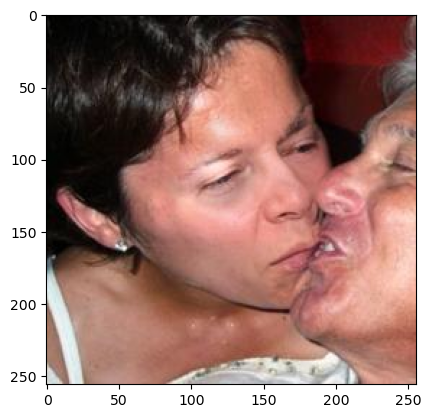

In [55]:
# Show new image
plt.imshow(new_img * 1./255);

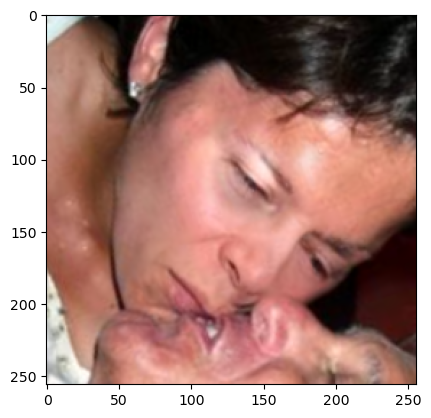

In [66]:
# Finalized function 
new_img_aug = data_augmentation(exp_img)
new_img = np.squeeze(new_img_aug)
plt.imshow(new_img * 1./255);

# Model 8: EfficientNetV2L with Augmentation

In [67]:
model8 = Sequential()

effnet_V2L_pretrained = EfficientNetV2L(
    weights='imagenet',   
    input_shape=(h,w,3), 
    include_top=False,
    include_preprocessing=True      #Efficientnet_2L expects [-1, 1] range, if set to False
)

effnet_V2L_pretrained.trainable = False

model8.add(data_augmentation)
model8.add(effnet_V2L_pretrained)

model8.add(GlobalAveragePooling2D())

model8.add(Dense(256, activation='relu'))
model8.add(BatchNormalization())
model8.add(Dropout(0.3))

model8.add(Dense(units = 1, activation='sigmoid'))
model8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 efficientnetv2-l (Functiona  (None, 8, 8, 1280)       117746848 
 l)                                                              
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_11 (Dense)            (None, 256)               327936    
                                                                 
 batch_normalization_6 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                      

In [68]:
# Compile
model8.compile(
    optimizer='adam',
    loss = 'bce',
    metrics = ['acc', 
                         metrics.Precision(), metrics.Recall(), 
                         metrics.AUC(),
                         metrics.FalseNegatives(), metrics.FalsePositives(),
                         metrics.TrueNegatives(),
                         metrics.TruePositives()]
)

In [69]:
h8 = model8.fit(train, validation_data = val, epochs = 10, callbacks = [reduce_lr, es])

Epoch 1/10
4376/4376 [==============================] - 2399s 541ms/step - loss: 0.5308 - acc: 0.7320 - precision_5: 0.7250 - recall_5: 0.7478 - auc_5: 0.8106 - false_negatives_5: 17653.0000 - false_positives_5: 19861.0000 - true_negatives_5: 50140.0000 - true_positives_5: 52348.0000 - val_loss: 0.4926 - val_acc: 0.7623 - val_precision_5: 0.8016 - val_recall_5: 0.6994 - val_auc_5: 0.8485 - val_false_negatives_5: 5947.0000 - val_false_positives_5: 3425.0000 - val_true_negatives_5: 16216.0000 - val_true_positives_5: 13840.0000 - lr: 0.0010
Epoch 2/10
4376/4376 [==============================] - 2237s 511ms/step - loss: 0.4946 - acc: 0.7549 - precision_5: 0.7470 - recall_5: 0.7711 - auc_5: 0.8374 - false_negatives_5: 16026.0000 - false_positives_5: 18284.0000 - true_negatives_5: 51717.0000 - true_positives_5: 53975.0000 - val_loss: 0.4951 - val_acc: 0.7643 - val_precision_5: 0.8356 - val_recall_5: 0.6603 - val_auc_5: 0.8593 - val_false_negatives_5: 6722.0000 - val_false_positives_5: 2571.

In [85]:
# serialize model to JSON
anna_model8_json = model8.to_json()
with open("anna_model8.json", "w") as json_file:
    json_file.write(anna_model8_json)

# serialize weights to HDF5
model8.save_weights("anna_model8.h5")
print("Saved model to disk")

Saved model to disk


In [86]:
model8.save('anna_model8_complete.h5')